mapping ids...
creating nodes...
creating edges...
rendering chart...


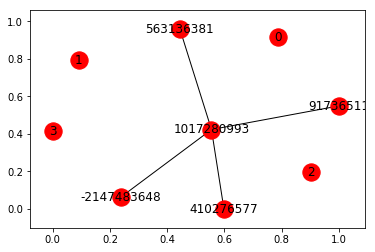

In [2]:
import csv
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

with open('test.csv','rt') as data: # reads in the network file
    data = csv.reader(data)
    headers = next(data)
    dataRows = [row for row in data]
    
uniquedataRows = list(set([row[0] for row in dataRows])) #takes the redundancies of the networks

id=list(enumerate(uniquedataRows))# creates a list of tuples with unique ids and their names for each superhero in the network

keys = {name: i for i, name in enumerate(uniquedataRows)} #creates a dictionary(hash map) that maps each id to the superhero names
 
links = [] #creates a blank list
print ('mapping ids...')
for row in dataRows: #maps all of the names in the csv file to their id number
    try:
        links.append({keys[row[0]]: keys[row[1]]})
    except: 
        links.append({row[0]: row[1]})

G = nx.Graph() #creates a graph
NodeId=[] #takes source and target edges

for row in id:
    NodeId.append(row[0])

print ('creating nodes...')    
G.add_nodes_from(NodeId) #creates nodes for the graph.
print ('creating edges...')
for node in links:#loops through each link and changes each dictionary to a tuple so networkx can read in the information
    edges = list(node.items())
    G.add_edge(*edges[0])#takes the tuple from the list and unpacks the tuples
print ('rendering chart...')
nx.draw_networkx(G)